## Install required Packages

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from string import punctuation
import nltk
import seaborn as sns
sns.set()


## Loading Data

In [2]:
raw_gp_data = pd.read_excel('reviews_googleplay_1628400775.xlsx')
raw_itune_data = pd.read_excel('reviews_itunes_1628401335.xlsx')
gp_data = raw_gp_data[['AppName', 'Rating', 'Review']]
itune_data = raw_itune_data[['AppName', 'Rating', 'Review']]

# copy data for further processing
data = itune_data.copy()

In [3]:
# Display data
data.head()

AppName  ...                                             Review
0  Hey! VINA - Meet New Friends  ...  App looks great - please set up in London it w...
1  Hey! VINA - Meet New Friends  ...  Please please please make this app available i...
2  Hey! VINA - Meet New Friends  ...  Allows you to access Facebook profile then goe...
3  Hey! VINA - Meet New Friends  ...  Doesn't allow you to sign up if you don't have...
4  Hey! VINA - Meet New Friends  ...                                        Frustrated.

[5 rows x 3 columns]

## Exploratory Data Analysis

In [4]:
# Describe all data
data.describe(include = 'all')

AppName  ...                                             Review
count                            882  ...                                                882
unique                             4  ...                                                881
top     Hey! VINA - Meet New Friends  ...  I installed the app and I got excited because ...
freq                             631  ...                                                  2
mean                             NaN  ...                                                NaN
std                              NaN  ...                                                NaN
min                              NaN  ...                                                NaN
25%                              NaN  ...                                                NaN
50%                              NaN  ...                                                NaN
75%                              NaN  ...                                                NaN
max                              NaN  ...                                                NaN

[11 rows x 3 columns]

In [5]:
def process_review(data, app_name, ratings, punctuation, stop_words, max_n_grams, nlp):
  # Apply NLP to all summary column
  data.Review = data.Review.apply(lambda review: nlp(review))

  # Stop words of Spacy Library
  stop_words = nlp.Defaults.stop_words
  punctuation = punctuation + '\n '

  # Removing punctuation (!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)
  # Removing stop words (a , an, the, in, on etc)
  # Getting the base words through lematization
  # Removing adjectives
  # Lower case all reviews

  data.Review = data.Review.apply(lambda doc: [token.lemma_.lower() for token in doc
                                                    if (token.text not in punctuation 
                                                        and token.text.lower() not in stop_words
                                                        and token.pos_ is not 'ADJ')])

  # Joining the tokens
  data.Review = data.Review.apply(lambda x: " ".join(x))

  # gettting all reviews and convertting to words by spacy tokenizer
  all_reviews = ''.join(data['Review'].tolist())
  words = [token.text for token in nlp(all_reviews)] 
  for n in range(1, max_n_grams):
    df = (pd.Series(nltk.ngrams(words, n)).value_counts())[:20]
    df.plot(kind='bar')
    plt.ylabel('Importance')
    plt.xlabel('words')
    plt.title(f'{app_name} review :: {n} gram/s :: {ratings} ratings')
    plt.show()
  return words

Processing Aphinity - Meet New People


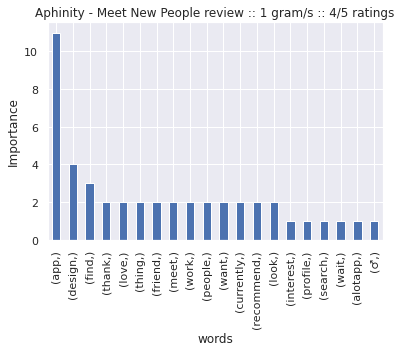

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129335 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129335 missing from current font.
  font.set_text(s, 0, flags=flags)


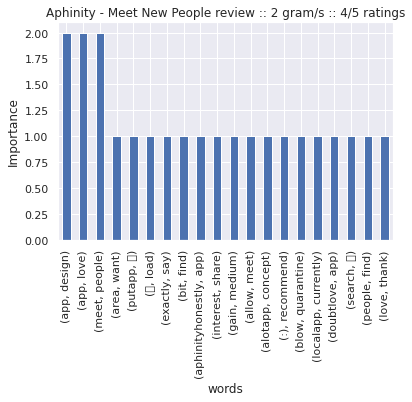

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


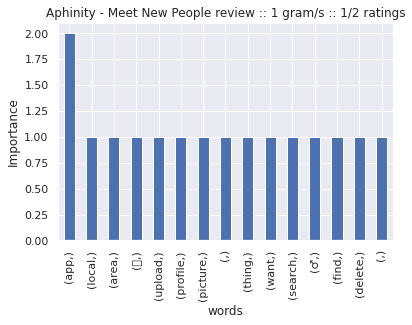

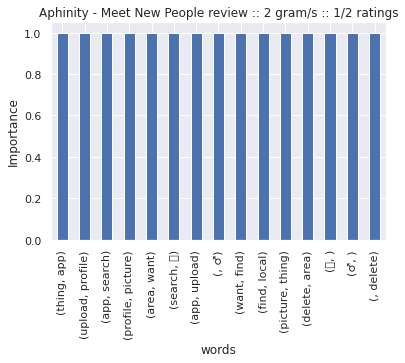

Processing Hey! VINA - Meet New Friends


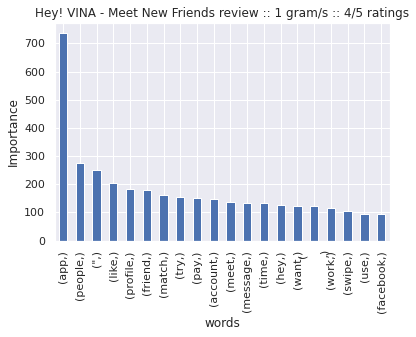

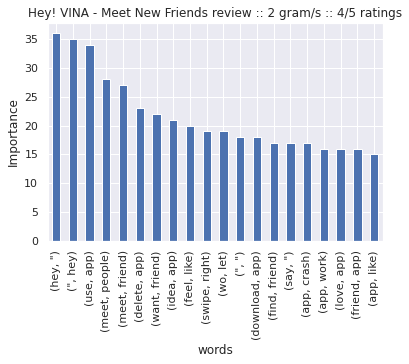

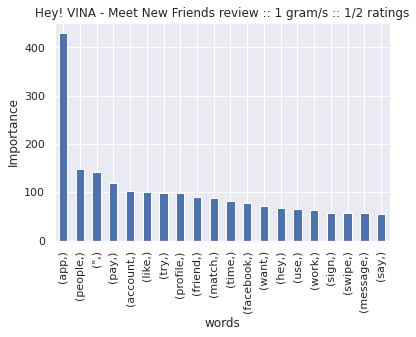

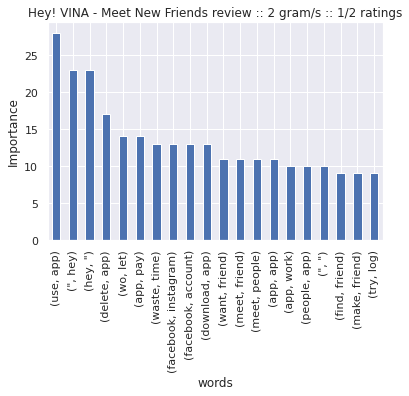

Processing Serendip


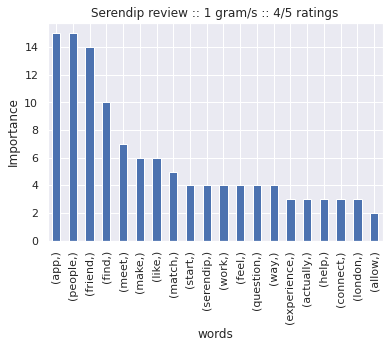

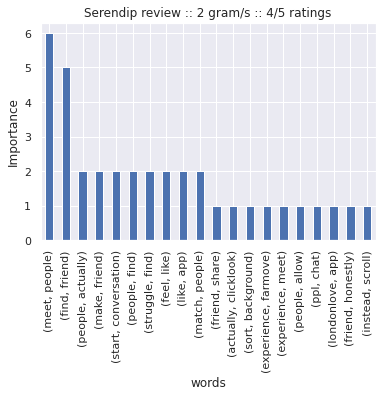

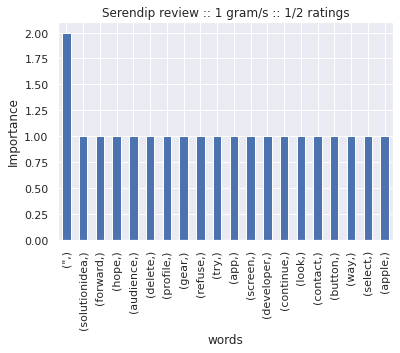

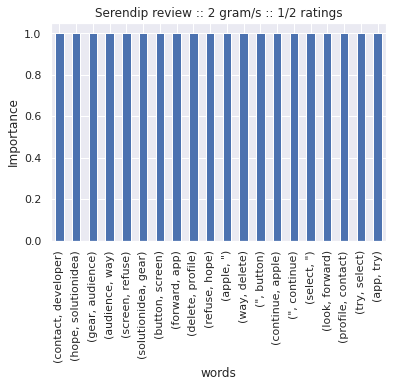

Processing We3: Meet New People in Groups


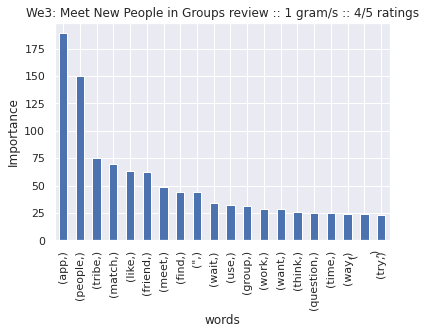

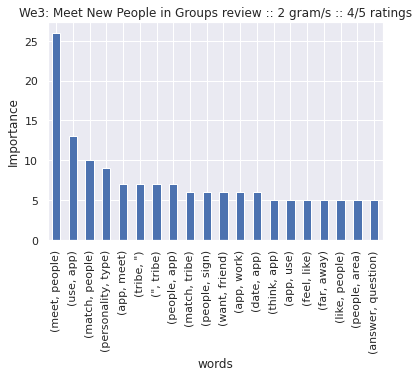

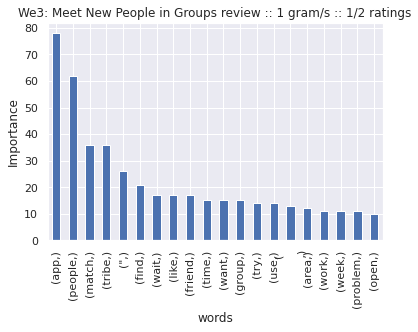

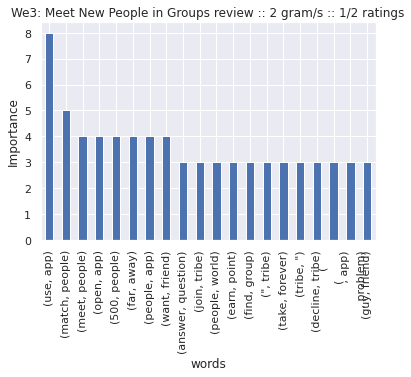

In [6]:
df_groups = data.groupby(['AppName'])
punctuation = punctuation + '\n '
max_n_grams = 3
# Loading Spacy
nlp = spacy.load('en_core_web_lg')
stop_words = nlp.Defaults.stop_words
for app_name,df_group in df_groups:
  print(f'Processing {app_name}')
  df_group_4_5 = df_group.loc[df_group['Rating'].isin([5, 4])]
  df_group_1_2 = df_group.loc[df_group['Rating'].isin([1, 2])]
  if df_group_4_5.size > 0:
    process_review(df_group, app_name, '4/5', punctuation, stop_words, max_n_grams, nlp)
  if df_group_1_2.size > 0:
    process_review(df_group_1_2, app_name, '1/2', punctuation, stop_words, max_n_grams, nlp)
